# 히스토그램
- 영상을 구성하는 픽셀들의 빈도수를 측정하여 그래프(히스토그램)으로 표현
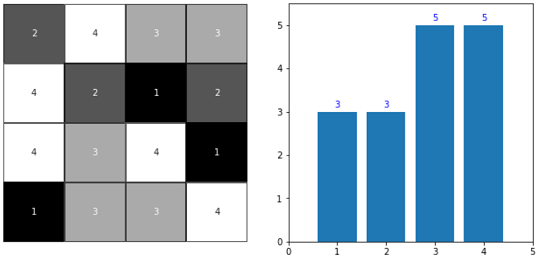

- **`cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None)**
    - images: 히스토그램을 구할 입력영상 리스트
    - channels: 히스토그램을 구할 채널 리스트
    - mask: 마스크 영상. 영상전체일 경우 None지정
    - histSize: 히스토그램 각 채널의 bin의 개수 리스트
    - ranges: 히스토그램 각 채널의 최솟값과 최대값 리스트

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
img = cv2.imread('images/window.jpg', cv2.IMREAD_GRAYSCALE)
img.shape, img.size

((576, 869), 500544)

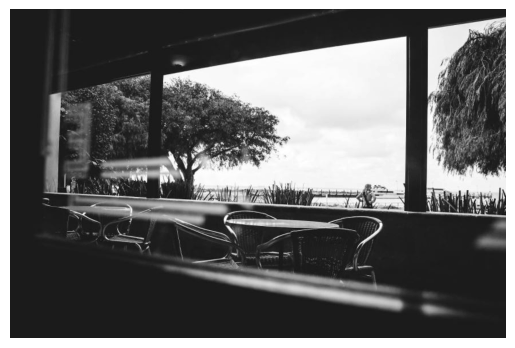

In [18]:
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

In [19]:
hist = cv2.calcHist(images = [img], 
                    channels = [0], 
                    mask = None, 
                    histSize = [256], 
                    ranges = [0, 255])

print(type(hist))

<class 'numpy.ndarray'>


In [ ]:
# 각 pixel 값들의 개수를 센 결과를 반환해준다.

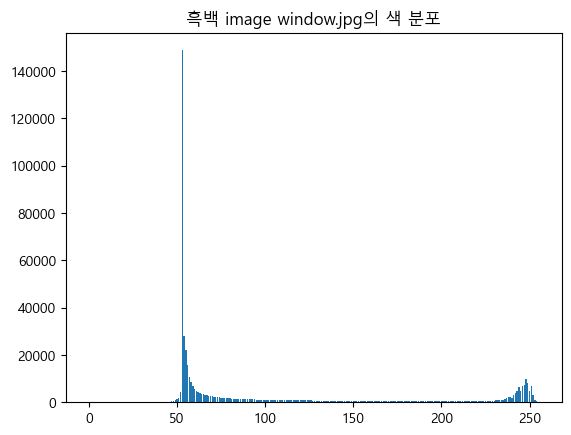

In [20]:
# 위의 반환 결과 ndarray를 bar plot으로 그려보자.
plt.bar(range(hist.size), hist.flatten())
plt.title('흑백 image window.jpg의 색 분포')
plt.show()

In [9]:
img_color = cv2.imread('images/lenna.bmp')
img_color.shape

(512, 512, 3)

In [11]:
BGR_channels = cv2.split(img_color)
type(BGR_channels), np.shape(BGR_channels)

(tuple, (3, 512, 512))

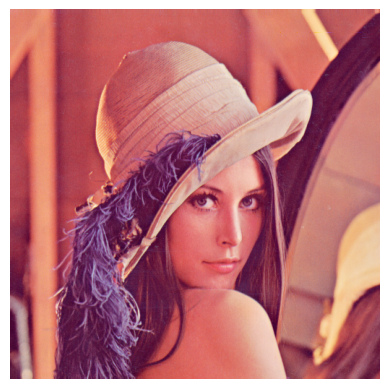

In [14]:
plt.imshow(img_color[:, :, ::-1])
plt.axis('off')
plt.show()

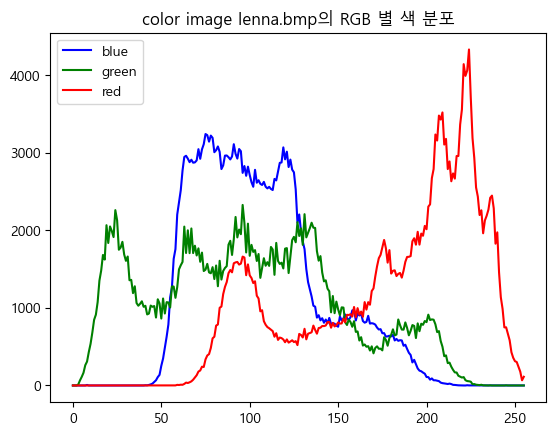

In [21]:
labels = ['blue', 'green', 'red']

for label, channel in zip(labels, BGR_channels):
    hist = cv2.calcHist(images = [channel], 
                        channels = [0],
                        mask = None, 
                        histSize = [256], 
                        ranges = [0, 256])
    plt.plot(range(hist.size), hist.flatten(), color = label, label = label)
    
plt.legend()
plt.title('color image lenna.bmp의 RGB 별 색 분포')
plt.show()

# 밝기 조절하기(brightness)
- 영상을 전체적으로 밝게 또는 어둡게 만드는 연산
- 밝기 조절 수식
    - 원본좌표(x,y) + n
    - n이 양수면 각 좌표의 픽셀값이 커지므로 밝아진다.
    - n이 음수이면 각 좌표의 픽셀값이 작아지므로 어두워 진다.
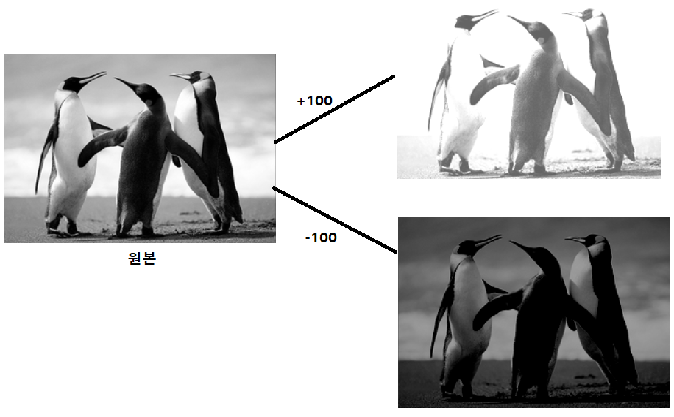
    
- **`cv2.add(src1, src2)`**
    - 밝기 조절이나 두 영상을 합치기에 사용할 수 있다.
    - src1: 첫번째 영상 또는 스칼라
    - src2: 두번째 영상 또는 스칼라
    - src2를 src1에 더한다.
- pixel에 스칼라 값을 더하거나 빼면 0 ~ 255의 범위를 넘어설 수 있다. ndarray의 type은 uint8(unsigned int8) 로 0 ~ 255범위를 넘어가는 숫자는 순환되어 버린다. 
    - 계산결과가 0이하가 되면 255로 부터 작아지게 되고 255가 넘어가면 0으로 가서 커지게 된다.
    - 그래서 cv2.add() 함수는 값이 순환되지 않도록 0이하의 값은 0으로 255이상의 값은 255가 되도록 처리한다. 이것을 **saturate연산**이라고 한다.

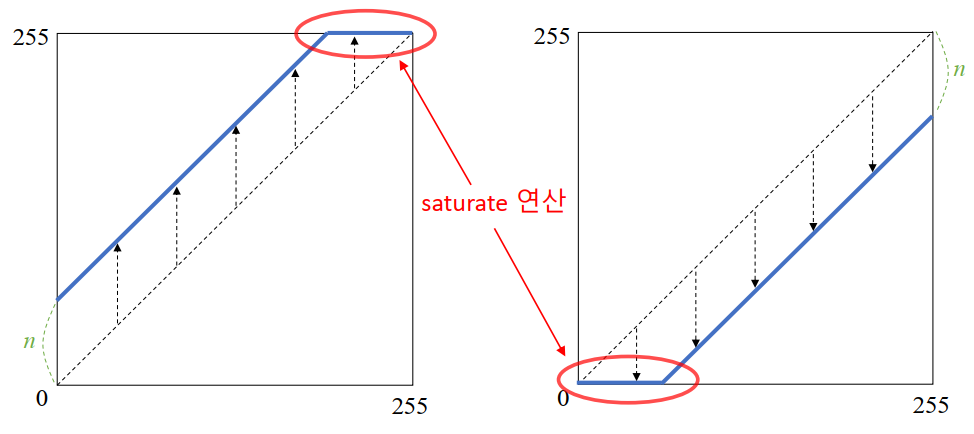

In [5]:
img = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
img = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('frame', img + 100)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
img = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)

img = cv2.add(img, 100)
cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
img = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)

img = cv2.add(img, -100)
cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

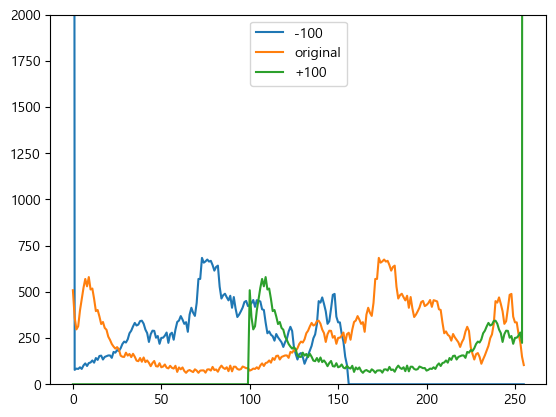

In [15]:
img = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)
img_d = cv2.add(img, -100)
img_b = cv2.add(img, 100)

l = [('-100', img_d), ('original', img), ('+100', img_b)]
for label, image in l:
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(range(256), hist.flatten(), label = label)

plt.ylim(0, 2000)
plt.legend()
plt.show()

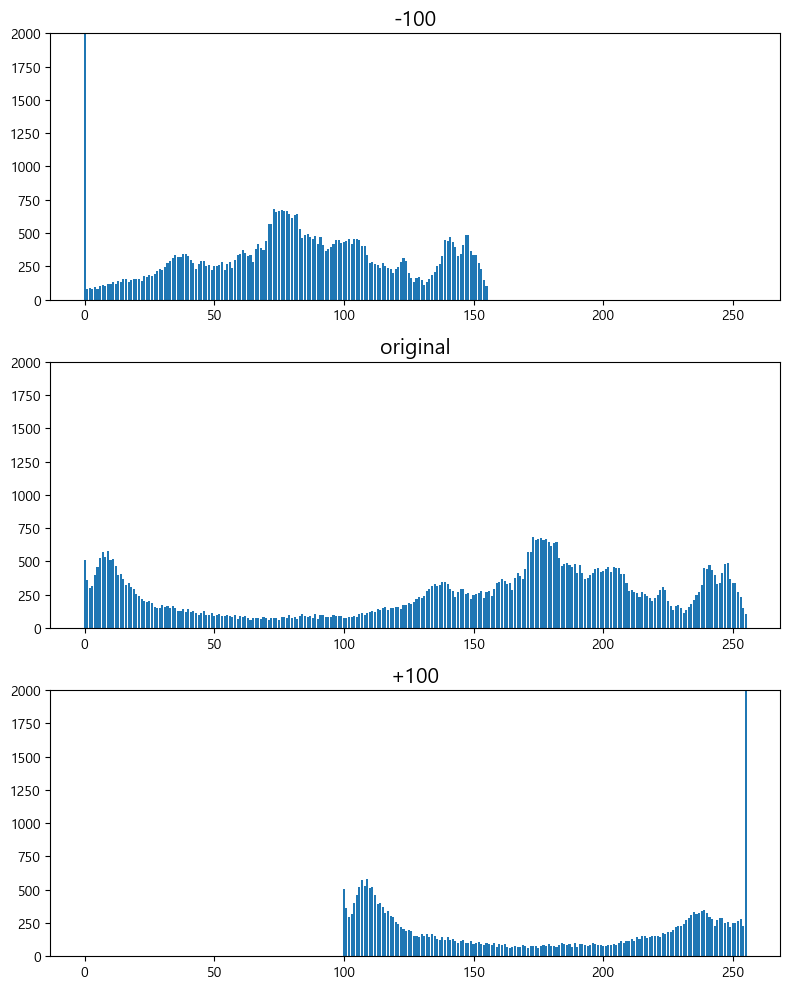

In [23]:
img = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)
img_d = cv2.add(img, -100)
img_b = cv2.add(img, 100)

plt.figure(figsize = (8, 10))

l = [('-100', img_d), ('original', img), ('+100', img_b)]
for i in range(len(l)):
    plt.subplot(3, 1, i + 1)
    hist = cv2.calcHist([l[i][1]], [0], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten())
    plt.title(f'{l[i][0]}', fontsize = 15)
    plt.ylim(0, 2000)

plt.tight_layout()
plt.show()

# 명암비(Contrast) 조정

## 명암비/대비(Contrast)란
- 밝은 부분과 어두분 부분 사이의 밝기의 정도 차이
    - 영상이 전체적으로 밝은 픽셀들로만 구성되거나 어두운 픽셀들로만 구성되면 명암비가 낮다고 표현한다. 
    - 영상에 밝은 영역과 어두운 역역이 골고루 섞여있으면 명암비가 높다고 표현한다.
- 명암비가 낮으면 객체간의 구분이 되지 않아 흐릿한 느낌이 나고 명암비가 높으면 선명한 느낌이 든다.
![image.png](attachment:image.png)

- 명암비를 변환하는 함수공식
$$
g(x, y)=f(x,y)+(f(x,y)-128) \alpha=(1+\alpha)f(x, y)-\alpha 128
$$

- $g$: 결과 image
- $f$: 원본 image
- $x$: x 좌표
- $y$: y 좌표
- $\alpha$: contrast를 조절하는 값
    - 0: 원본과 동일하다.
    - 음수: contrast를 낮춘다.
    - 양수: contrast를 높인다.

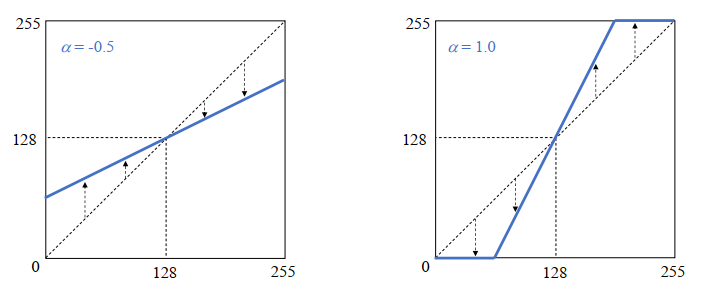

In [52]:
def change_contrast(img, alpha = 0.0):
    '''
    contrast를 조절하는 함수이다.
    [parameter]
        img: ndarray - contrast를 변경할 image 배열을 입럭받는다.
        alpha: float - contrast를 조절하는 값이다.
            -1 ~ 0: contrast를 낮춘다.
            0.0: 기본값. 원본과 동일하게 한다.
            양수: contrast를 높인다.
    [return]
        ndarray - contrast를 변환한 image 배열을 반환한다.
    '''
    return np.clip((1.0 + alpha)*img - 128*alpha, 0, 255).astype('uint8')

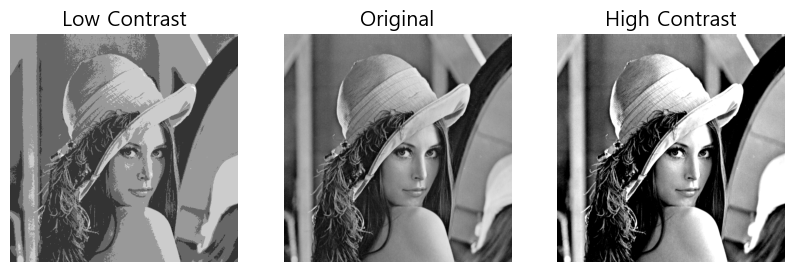

In [78]:
img = cv2.imread('images/lenna.bmp', cv2.IMREAD_GRAYSCALE)
img_contrast_low = change_contrast(img, -0.98)
img_contrast_high = change_contrast(img, 1)

plt.figure(figsize = (10, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_contrast_low, cmap = 'gray')
plt.title('Low Contrast', fontsize = 15)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img, cmap = 'gray')
plt.title('Original', fontsize = 15)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_contrast_high, cmap = 'gray')
plt.title('High Contrast', fontsize = 15)
plt.axis('off')

plt.show()

# 채도 (Saturation) 변환
- 채도: 색의 선명도를 말한다.
- 채도를 변환할 때는 HSV color 타입으로 변환한 뒤 S의 값을 바꾼다.
> HSV : 색상(Hue), 채도(Saturation), 명도(Value)

In [62]:
img = cv2.imread('images/lenna.bmp')
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_HSV_low = img_HSV.copy()
img_HSV_high = img_HSV.copy()

In [76]:
# saturation을 낮춘다.
# saturation 값 추출
img_HSV[:, :, 1]

array([[114, 114, 103, ..., 120, 128, 140],
       [114, 114, 103, ..., 120, 128, 140],
       [114, 114, 103, ..., 120, 128, 140],
       ...,
       [200, 200, 180, ..., 147, 154, 166],
       [187, 187, 170, ..., 155, 155, 153],
       [187, 187, 170, ..., 155, 155, 153]], dtype=uint8)

In [66]:
# saturation 값을 낮춰보자. 이때 np.clip를 사용해 값이 순환되지 않도록 한 후 type을 uint8로 바꾼다.
img_HSV_low[:, :, 1] = np.clip(img_HSV_low[:, :, 1] - 50.0, 0, 255).astype('uint8')

In [67]:
img_HSV_high[:, :, 1] = np.clip(img_HSV_high[:, :, 1] + 50.0, 0, 255).astype('uint8')

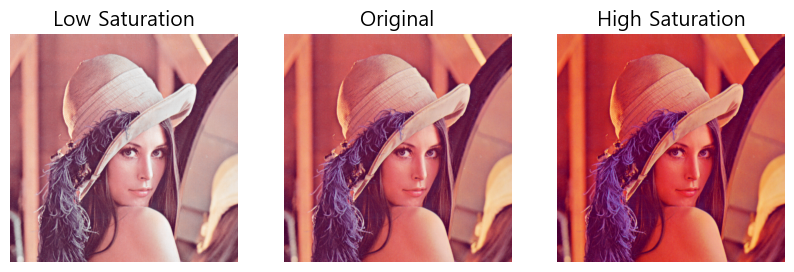

In [79]:
img_RGB = cv2.cvtColor(img_HSV, cv2.COLOR_HSV2RGB)
img_HSV_low_RGB = cv2.cvtColor(img_HSV_low, cv2.COLOR_HSV2RGB)
img_HSV_high_RGB = cv2.cvtColor(img_HSV_high, cv2.COLOR_HSV2RGB)

plt.figure(figsize = (10, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_HSV_low_RGB)
plt.title('Low Saturation', fontsize = 15)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_RGB)
plt.title('Original', fontsize = 15)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_HSV_high_RGB)
plt.title('High Saturation', fontsize = 15)
plt.axis('off')

plt.show()

# Filter 

## Filtering 개요
- 영상에서 필요한 정보만 통과시키고 필요없는 정보는 걸러내는 작업을 말한다.
- N x N행렬을 영상과 Convolution연산(Correlation연산)을 하여 처리한다.
    - 영상과 연산하는 N x N 행렬을 커널(Kernel), 마스크(Mask), 윈도우(Window)라고 한다.
    - Convolution연산
        - Filter를 영상을 이동하면서 같은 index의 값끼리 곱한뒤 다 더한다. 
        ![conv](figures/conv.gif)        
        
    - 최외곽처리는 바깥에 가상의 픽셀들이 있다고 생각하고 거기에 임의의 값을 채워 계산한다. 
        - 가상의 바깥픽셀을 **Padding**이라고 한다.
        - 바깥픽셀을 채우는 방법
            - BORDER_CONSTANT : 같은 값으로 채운다. 보통 0으로 채움   000|abcd|000
            - BORDER_REPLICATE: 외곽에 있는 값으로 채운다. aaa|abcd|ddd
            - BORDER_REFLECT: 거울에 반사되는 형식으로 채운다. cba|abcd|dcb
            - BORDER_REFLECT_101: (OpenCV 기본방식)BORDER_REFLECT와 같은 형식인데 가장 외곽의 값은 반사시키지 않는다. dcb|abcd|cba
    - N x N 행렬이 어떤 값을 가지고 있느냐에 따라 다양한 영상처리가 가능하다.
        - Bluring: 영상을 부드럽게 만들기
        - Shapening: 영상을 날카롭게 만들기
        - 엣지 검출
        - Noise 제거
    - 다양한 형태의 Kernel이 있으나 보통 3 x 3 행렬을 많이 쓴다.
    
    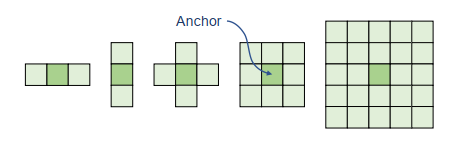
        
        - anchor(고정점): 영상에서 Filtering을 하려는 지점을 가리키는 필터의 중앙점을 사용한다.

## Blurring
- 영상을 흐릿/부드럽게 만드는 작업.
- 픽셀간의 값의 차이를 줄여서 날카로운 엣지가 무뎌지고 영상에 있는 Noise(잡음)이 사라지도록 하는 효과가 있다.
> 엣지(Edge): 물체간의 경계부분으로 contrast(대비)가 크다.

### 평균값 블러링(Average Blur)
- 주변 픽셀의 평균값을 합성곱하여 적용한다.
- 보통 3 x 3이나 5 x 5 필터를 많이 쓰며 필터의 크기가 커질수록 더 흐릿하게 변환된다.
- 영상이 뭉게져 세밀한 부분이 잘 안보이는 단점이 있다.

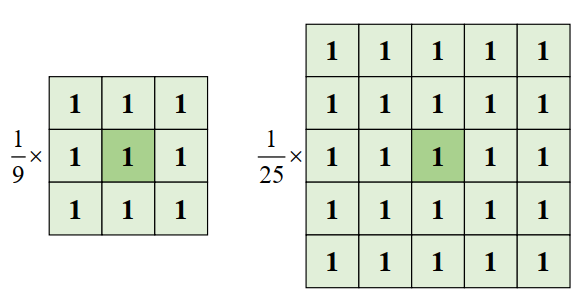
<center>필터 예</center>

- **`cv2.blur(src, ksize)`**
    - src: blur 처리할 입력영상
    - ksize: 필터의 크기. (width, height) 튜플로 지정

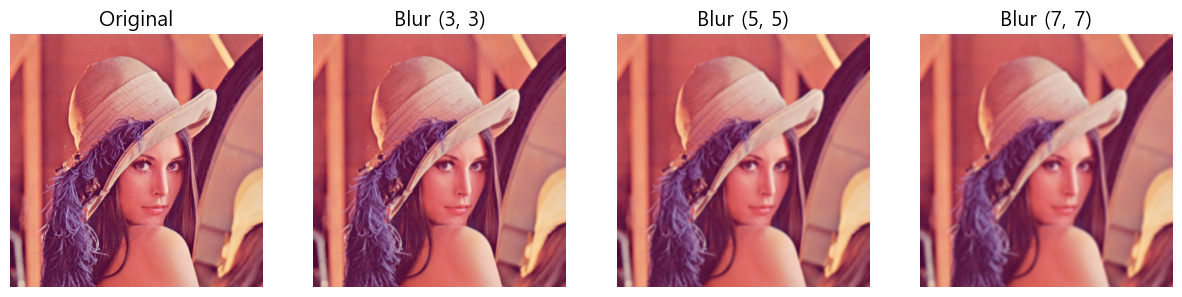

In [89]:
img = cv2.imread('images/lenna.bmp')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blur_3 = cv2.blur(img_RGB, ksize = (3, 3))
img_blur_5 = cv2.blur(img_RGB, ksize = (5, 5))
img_blur_7 = cv2.blur(img_RGB, ksize = (7, 7))

plt.figure(figsize = (15, 10))

plt.subplot(1, 4, 1)
plt.imshow(img_RGB)
plt.title('Original', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_blur_3)
plt.title('Blur (3, 3)', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_blur_5)
plt.title('Blur (5, 5)', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_blur_7)
plt.title('Blur (7, 7)', fontsize = 15)
plt.axis('off')

plt.show()

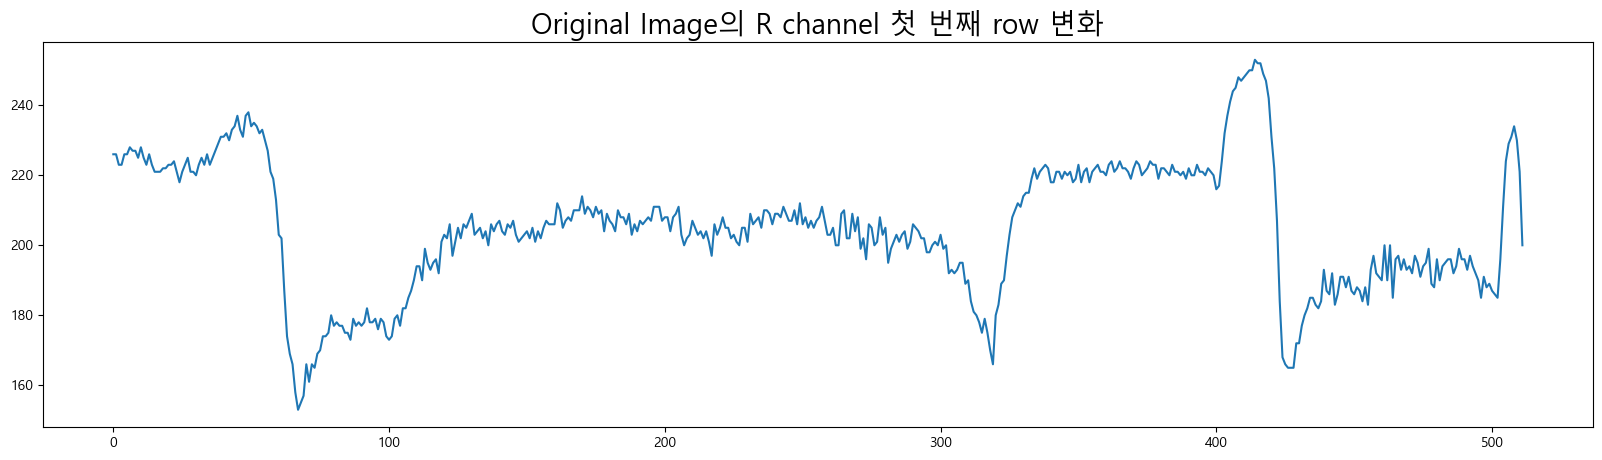

In [100]:
plt.figure(figsize = (20, 5))
plt.plot(img_RGB[0, :, 0])
plt.title('Original Image의 R channel 첫 번째 row 변화', fontsize = 20)
plt.show()

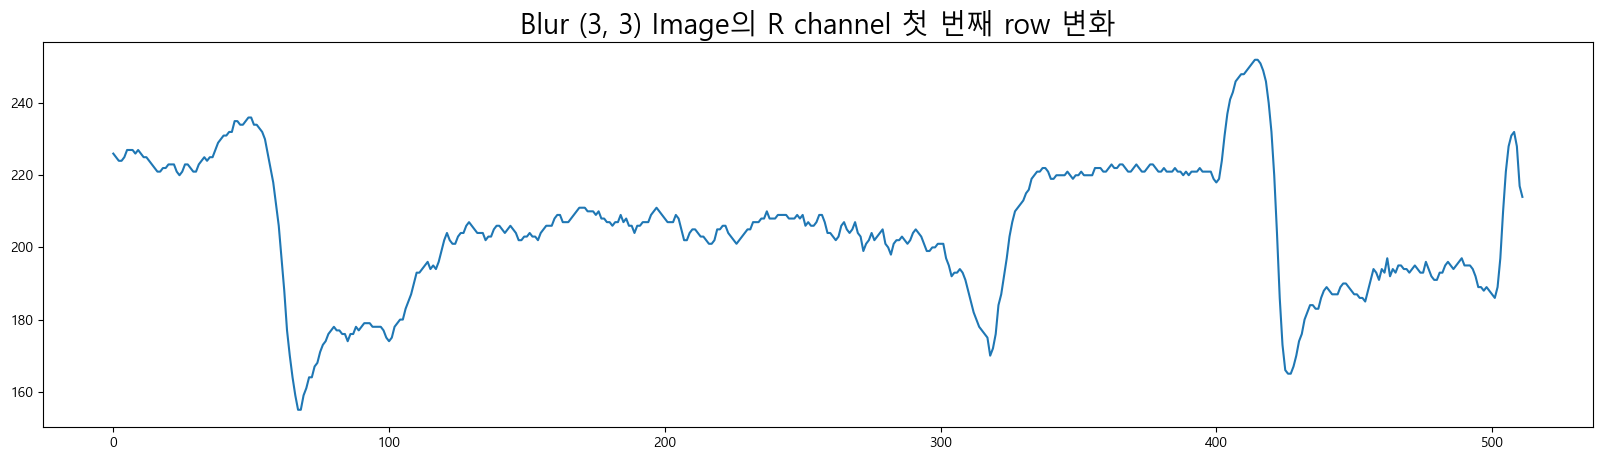

In [102]:
plt.figure(figsize = (20, 5))
plt.plot(img_blur_3[0, :, 0])
plt.title('Blur (3, 3) Image의 R channel 첫 번째 row 변화', fontsize = 20)
plt.show()

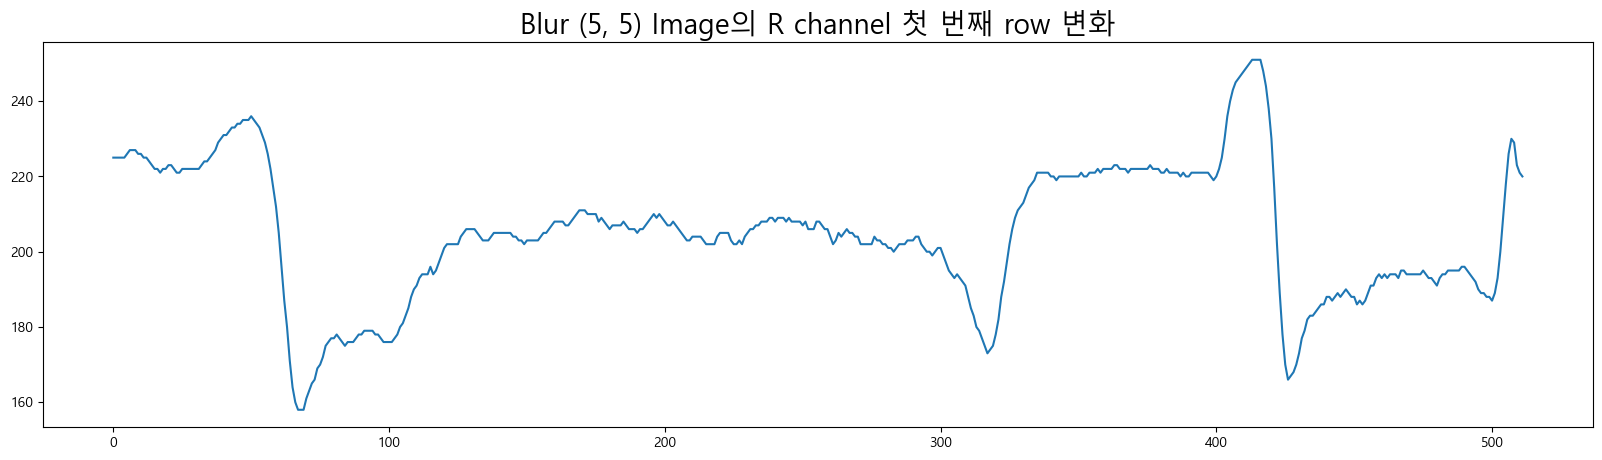

In [103]:
plt.figure(figsize = (20, 5))
plt.plot(img_blur_5[0, :, 0])
plt.title('Blur (5, 5) Image의 R channel 첫 번째 row 변화', fontsize = 20)
plt.show()

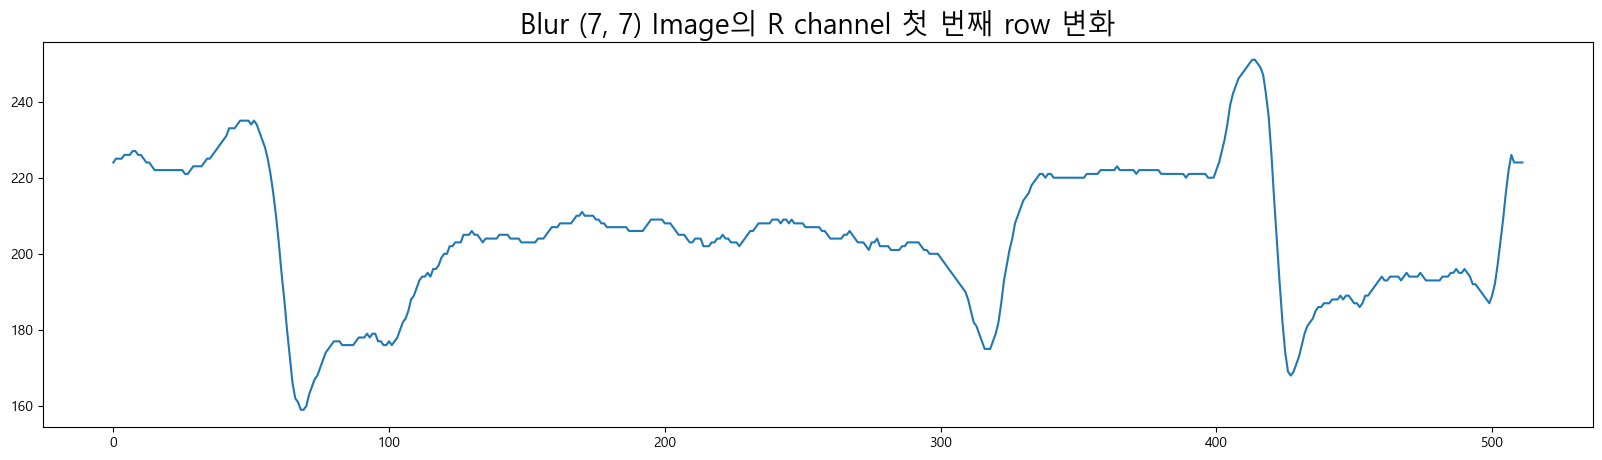

In [104]:
plt.figure(figsize = (20, 5))
plt.plot(img_blur_7[0, :, 0])
plt.title('Blur (7, 7) Image의 R channel 첫 번째 row 변화', fontsize = 20)
plt.show()

### Gaussian Blur

- 대상 픽셀(Anchor)와 가까운 픽셀은 큰 가중치 멀리있는 픽셀은 작은 가중치를 사용해서 평균(가중평균)을 계산해서 필터링 한다.
    - Gaussian 분포(정규분포)의 확률밀도 함수를 사용해 필터에 들어갈 값들을 계산하여 대상픽셀을 기준으로 멀어질 수록 작은 값이 곱해지도록 한다. 
    - 평균은 0으로 하고 표준편차를 조정하여 흐림의 정도를 조절한다. 표준편차 값을 크게할 수록 흐려진다.
    - Filter의 shape은 $(8\sigma + 1,\;8\sigma + 1)$ 나 $(6\sigma + 1,\;6\sigma + 1)$ 으로 정해진다. $\sigma: 표준편차$
- Gaussian Blurring은 blur효과 뿐아니라 노이즈제거에도 많이 사용된다.

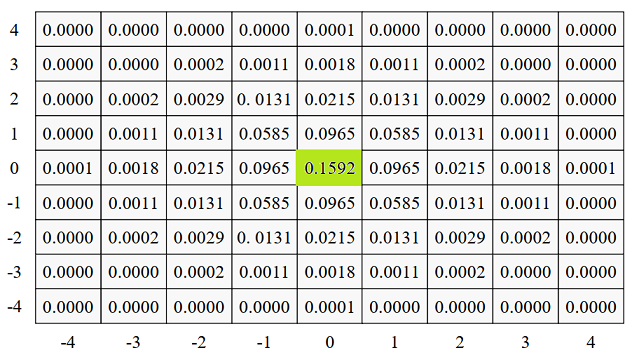

- **`cv2.GaussianBlur(src, ksize, sigmaX, sigmaY)`**
    - src: blur를 적용할 영상. 
    - ksize: 커널크기. (0,0)으로 지정하면 sigma 값에 의해 결정된다. (보통 0,0 으로 설정)
    - sigamX: X축방향 sigma(표준편차) 값
    - sigamY: Y축방향 sigma(표준편차) 값. 생략하면 sigmaX와 같은 값 사용


### 잡음 제거
- `cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)`
    - 양방향 필터로 선명도는 유지하면서 bluring을 이용해 노이즈를 제거한다.
    - src: 잡음을 제거할 입력영상
    - d: 필터의 크기 지정. 음수(-1)을 입력하면 sigmaSpace값에 의해 자동 결정된다. 일반적으로 -1을 설정한다.
    - sigmaColor
        - 엣지인지 아닌지를 판단하는 기준값. 지정한 값보다 크면 엣지라고 생각하고 작으면 엣지가 아니라고 생각해 그 지점을 blurring 한다.
        - 이 값을 너무 크게 주면 엣지가 검출이 안되서 그냥 Gaussian Filter 사용하는 것과 같다.
    - sigmaSpace: Gaussian Filter에서 지정한 표준편차

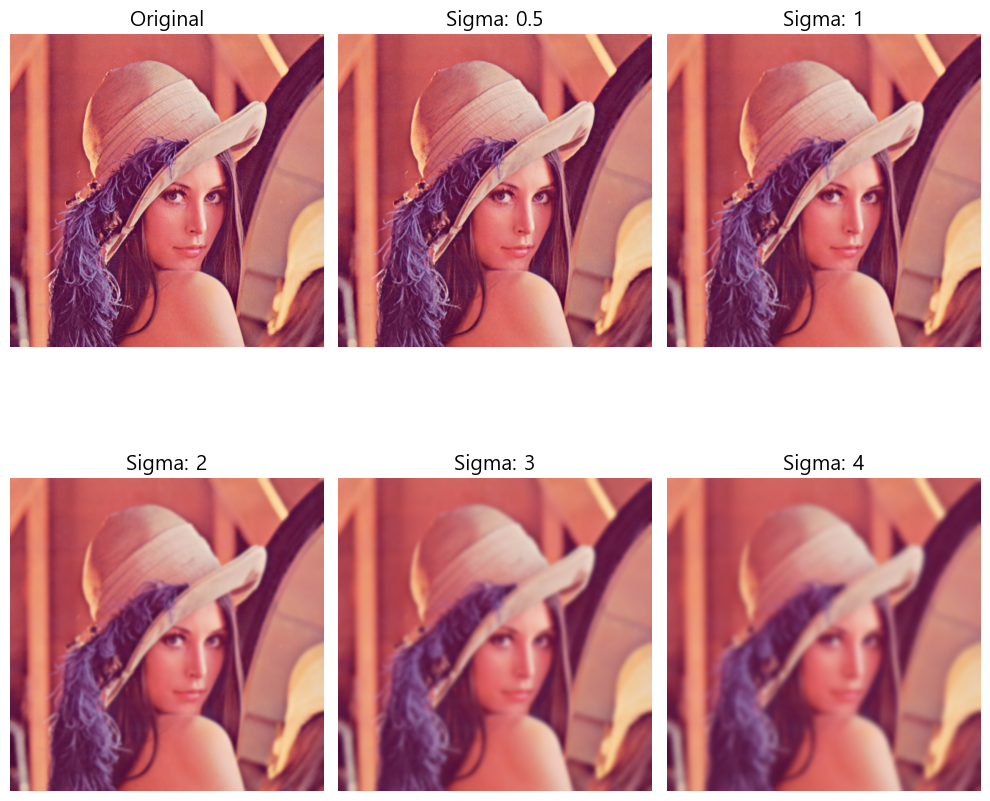

In [114]:
img = cv2.imread('images/lenna.bmp')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_RGB)
plt.title('Original', fontsize = 15)
plt.axis('off')

sigma_list = [0.5, 1, 2, 3, 4]

for i, sigma in enumerate(sigma_list, start = 2):
    img_g_blur = cv2.GaussianBlur(img_RGB, ksize = (0, 0), sigmaX = sigma)
    plt.subplot(2, 3, i)
    plt.imshow(img_g_blur)
    plt.title(f'Sigma: {sigma}', fontsize = 15)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 샤프닝(Shappen)
- Blurring의 반대로 흐린영상을 선명한 영상으로 만드는 작업.
- 이미지의 엣지(edge-사물의 윤곽부분)의 대비를 크게 만들어 준다.
    - 이미지 전체를 다 선명하게 하는 게 아니라 윤곽(edge)만 선명하게 만들어 명암비(contrast)를 크게해 선명하게 보이게 한다. 
- Unsharp mask(언샤프 마스크) 필터링
    - Unsharp한 영상을 이용해 Sharp한 영상을 만든다고 해서 Unsharp mask filtering 이라고 한다.
    - 원본 이미지에서 blurring 한 이미지를 뺀다음 그것을 원본이미지에 다시 더한다.
$$
h(x) = f(x)+\alpha(f(x)-\bar{f}(x))\\
f(x): 원본\;이미지\\
\bar{f}(x):\;원본\;이미지를\;blurring한\;이미지\\
\alpha: shappening\,정도\,조절값
$$

- 제공 함수는 없고 위 공식을 구현한다.